In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2,NaN,1.0,NaN,2.0,1.0,3.0,1.0,1
680,5,10.0,NaN,10.0,4.0,10.0,5.0,NaN,3
681,1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	66
float64		column 3	80
float64		column 4	16
float64		column 5	48
float64		column 6	16
float64		column 7	16
float64		column 8	50
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,617.000000,603.000000,667.000000,635.000000,667.000000,667.000000,633.000000,683.000000
mean,4.442167,3.081037,3.152570,2.841079,3.239370,3.496252,3.437781,2.815166,1.603221
std,2.820761,3.015099,2.952549,2.870361,2.258393,3.611531,2.434785,3.009314,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

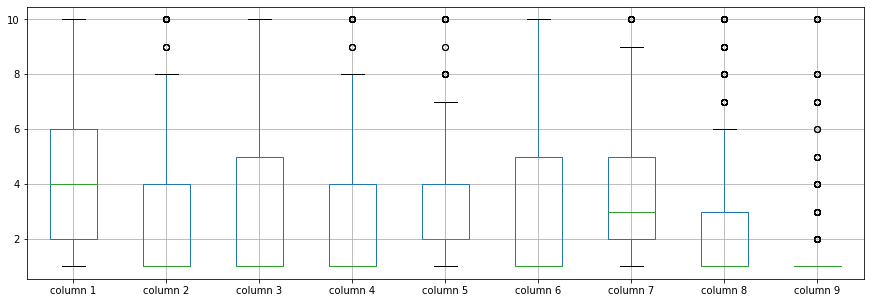

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.081037
column 3    3.152570
column 4    2.841079
column 5    3.239370
column 6    3.496252
column 7    3.437781
column 8    2.815166
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.650420,0.642101,0.486611,0.515364,0.591684,0.545368,0.535833,0.350957
column 2,0.650420,1.000000,0.910146,0.697455,0.745987,0.686949,0.741839,0.734280,0.438338
column 3,0.642101,0.910146,1.000000,0.675901,0.726053,0.713339,0.734454,0.717181,0.425958
column 4,0.486611,0.697455,0.675901,1.000000,0.590971,0.674092,0.665099,0.598008,0.419658
column 5,0.515364,0.745987,0.726053,0.590971,1.000000,0.581757,0.607288,0.620627,0.484486
column 6,0.591684,0.686949,0.713339,0.674092,0.581757,1.000000,0.672806,0.576406,0.323720
column 7,0.545368,0.741839,0.734454,0.665099,0.607288,0.672806,1.000000,0.674365,0.355312
column 8,0.535833,0.734280,0.717181,0.598008,0.620627,0.576406,0.674365,1.000000,0.421165
column 9,0.350957,0.438338,0.425958,0.419658,0.484486,0.323720,0.355312,0.421165,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+65,9+65+65,9+65+65,9+65+65+65+65,9+65+65+65,9+65+65,9+65,9], vae_layer = False, seed = 650)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 34.855192911057244
Epoch: 1 , loss: 34.756466320582796
Epoch: 2 , loss: 34.68385437556675
Epoch: 3 , loss: 33.87482225327265
Epoch: 4 , loss: 31.9961941582816
Epoch: 5 , loss: 30.276829810369584
Epoch: 6 , loss: 29.652845700581867
Epoch: 7 , loss: 28.872265179951984
Epoch: 8 , loss: 28.64470441000802
Epoch: 9 , loss: 27.603345916384743
Epoch: 10 , loss: 27.73335702078683
Epoch: 11 , loss: 27.27509108043852
Epoch: 12 , loss: 26.767714591253373
Epoch: 13 , loss: 26.624081475394114
Epoch: 14 , loss: 25.716082255045574
Epoch: 15 , loss: 25.57717686607724
Epoch: 16 , loss: 24.649795872824534
Epoch: 17 , loss: 24.79037670862107
Epoch: 18 , loss: 25.56783185686384
Epoch: 19 , loss: 24.161071913582937
Epoch: 20 , loss: 24.273327645801363
Epoch: 21 , loss: 24.709679898761568
Epoch: 22 , loss: 24.02520363671439
Epoch: 23 , loss: 24.322626000358945
Epoch: 24 , loss: 24.10975710550944
Epoch: 25 , loss: 24.380983534

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0
1,0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0
2,0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0
3,0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0
4,0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...
678,0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0
679,0,-0.35142,0.000000,-0.401091,0.0,0.0,0.0,0.000000,0
680,0,0.00000,-5.030545,0.000000,0.0,0.0,0.0,-1.526186,0
681,0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(53.74687934279547, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.16028141907756002

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.00000,1.000000,1.000000,2.0,1.0,3.0,1.000000,1
1,5,4.00000,4.000000,5.000000,7.0,10.0,3.0,2.000000,1
2,3,1.00000,1.000000,1.000000,2.0,2.0,3.0,1.000000,1
3,6,8.00000,8.000000,1.000000,3.0,4.0,3.0,7.000000,1
4,4,1.00000,1.000000,3.000000,2.0,1.0,3.0,1.000000,1
...,...,...,...,...,...,...,...,...,...
678,3,1.00000,1.000000,1.000000,2.0,1.0,2.0,1.000000,1
679,2,0.64858,1.000000,0.598909,2.0,1.0,3.0,1.000000,1
680,5,10.00000,4.969455,10.000000,4.0,10.0,5.0,4.473814,3
681,1,1.00000,1.000000,3.000000,2.0,1.0,1.0,1.000000,1


In [20]:
imputations[-1].to_excel("BCW_AL_5(imp).xlsx", index=False, header=False)